In [69]:
import gsd.hoomd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [3]:
def phi_to_L(phi=0.9,N=16000):
    return np.power(0.5*N*np.pi*((5/12)**2 + (7/12)**2)/phi,1/2) 

def L_to_phi(L, N=16000):
    return 0.5*N*np.pi*((5/12)**2 + (7/12)**2)/L**2

In [182]:
dirs= glob.glob("../test_data/constPressure0.01_N2048*")

In [134]:
glob.glob(dirs[0]+'/*')

['../test_data/constPressure0.001_N2048_seed23_maxStrain0.01_strainStep0.0001/log_tmp.dat',
 '../test_data/constPressure0.001_N2048_seed23_maxStrain0.01_strainStep0.0001/log.dat',
 '../test_data/constPressure0.001_N2048_seed23_maxStrain0.01_strainStep0.0001/traj.gsd']

In [183]:
file = dirs[3] + "/log.dat"
df = pd.read_csv(file, delimiter='\t')

In [184]:
traj = file.replace("log.dat","traj.gsd")
f = gsd.hoomd.open(name=traj, mode="rb")
s = f[0]

In [185]:
L = s.configuration.box[0]

In [186]:
L_to_phi(L, N=2048)

0.9318018171340945

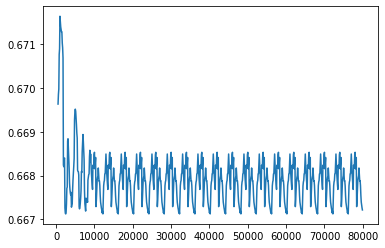

In [187]:
df["potential_energy"].iloc[500:80000:100].plot(marker='', linestyle='-')

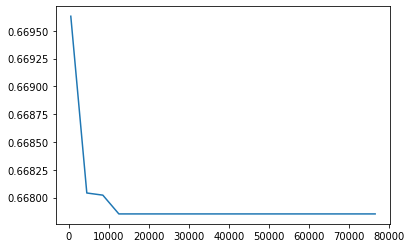

In [188]:
df["potential_energy"].iloc[500:80000:4000].plot(marker='', linestyle='-')

In [189]:
tmp = df["potential_energy"].iloc[500:80000:4000]

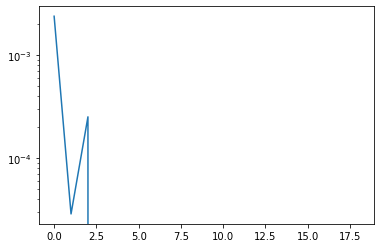

In [190]:
plt.plot(np.abs(np.diff(tmp))/np.mean(tmp))
plt.yscale('log')

TypeError: unsupported operand type(s) for *: 'int' and 'AxesSubplot'

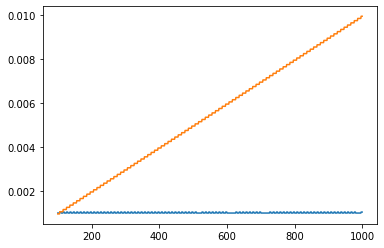

In [93]:
df["pressure"].iloc[100:1000].plot()
df["xy"].iloc[100:1000].plot()